In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [35]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


Data Preprocessing 

In [36]:
data.shape

(7920, 3)

In [37]:
data.duplicated().sum()

np.int64(0)

In [38]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Taxt Preprocessing 

In [39]:
import re
import string 

convert uppercase to lowercase

In [40]:
data["tweet"].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [41]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [42]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Links 

In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

In [44]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuation

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [47]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [ ]:
Remove numbers

In [48]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex = True)

In [49]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stop Words 

In [50]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk

In [51]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
sw

In [53]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split()if x not in sw))

In [54]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [ ]:
Stemming

In [55]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [56]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [57]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [58]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


##Building Vacabulary

In [59]:
from collections import Counter
vocab = Counter()

In [60]:
vocab.update(['java', 'python', 'python', 'c++'])

In [61]:
vocab

Counter({'python': 2, 'java': 1, 'c++': 1})

In [62]:
Counter({'python': 2, 'java': 1, 'c++': 1})

Counter({'python': 2, 'java': 1, 'c++': 1})

In [63]:
for sentence in data['tweet']:
    #print(sentence)
    vocab.update(sentence.split())

In [64]:
len(vocab)

15951

In [65]:
data.shape

(7920, 3)

In [67]:
tokens =[key for key in vocab if vocab[key] > 10] 

In [68]:
len(tokens)

1145

In [69]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt') 

### Divide dataset

In [70]:
X = data ['tweet']
y = data ['label']

In [ ]:
!pip install scikit-learn

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [73]:
X_train.shape

(6336,)

In [74]:
X_test.shape

(1584,)

In [75]:
X_train

7795    free lord rangoli … diwali diwali diwalirangol...
5874    “kosmonatik new appl map app suckkkksssss ugh ...
7184    cute brain gonna explod kawaii appl case pink ...
3345    jailbroken appl ipad awesom amaz cydia app ye ...
5943        spent tuck money charger good thanksappl appl
                              ...                        
4685    christma parti princessjuju joy familyeugeneor...
3231    new phone case arriv new phone case white rabb...
689     new phone thakyousomuchdad mypic minenow mypho...
2632    fuck appl youv made phone break sneez liter st...
1228          got ipad whop whop lol offici appl user lol
Name: tweet, Length: 6336, dtype: object

In [ ]:
Vactorization

In [76]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)

    return vectorized_lst_new

In [77]:
vectorized_x_train =vectorizer(X_train, tokens)

In [ ]:
#vectorized_x_train
for i in vectorized_x_train[0]:
    print(i)

In [79]:
vectorized_x_test =vectorizer(X_test, tokens)

In [80]:
vectorized_x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
y_train

7795    0
5874    1
7184    0
3345    0
5943    1
       ..
4685    0
3231    0
689     0
2632    1
1228    0
Name: label, Length: 6336, dtype: int64

In [82]:
y_test

3976    0
2294    0
6232    0
2731    0
7568    0
       ..
4314    0
4930    1
3052    1
3537    1
2824    0
Name: label, Length: 1584, dtype: int64

In [83]:
y_train.value_counts()

label
0    4699
1    1637
Name: count, dtype: int64

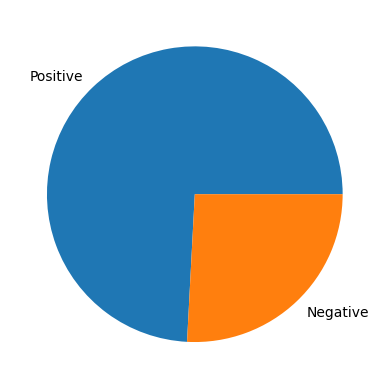

In [84]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels =['Positive','Negative'])
plt.show()

In [ ]:
!pip install imbalanced-learn

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9398, 1145) (9398,)


In [87]:
y_train_smote.value_counts()

label
0    4699
1    4699
Name: count, dtype: int64

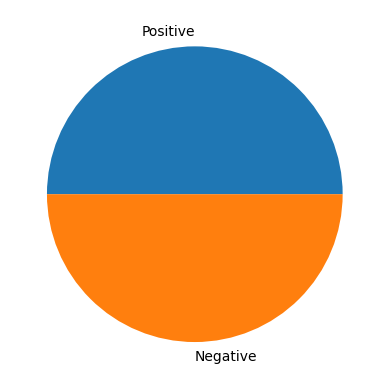

In [88]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels =['Positive','Negative'])
plt.show()

In [90]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
vectorized_x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
y_test

3976    0
2294    0
6232    0
2731    0
7568    0
       ..
4314    0
4930    1
3052    1
3537    1
2824    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    re = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training Scores:\nAccuracy = {acc}\nPrecision = {pr}\nRecall = {re}\nF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


Logistic Regression

In [95]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [97]:
y_train_pred = lr.predict (vectorized_x_train_smote)

In [98]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 1])

In [99]:
y_train_smote

0       0
1       1
2       0
3       0
4       1
       ..
9393    1
9394    1
9395    1
9396    1
9397    1
Name: label, Length: 9398, dtype: int64

In [100]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
Accuracy = 0.939
Precision = 0.915
Recall = 0.968
F1-Score = 0.941


In [101]:
y_test_pred = lr.predict (vectorized_x_test)

In [102]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 1])

In [103]:
y_test

3976    0
2294    0
6232    0
2731    0
7568    0
       ..
4314    0
4930    1
3052    1
3537    1
2824    0
Name: label, Length: 1584, dtype: int64

In [104]:
validation_scores(y_test , y_test_pred)

Testing Scores:
	Accuracy = 0.871
	Precision = 0.696
	Recall = 0.846
	F1-Score = 0.763


Naive Bayes

In [105]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
Accuracy = 0.906
Precision = 0.87
Recall = 0.955
F1-Score = 0.91
Testing Scores:
	Accuracy = 0.875
	Precision = 0.681
	Recall = 0.923
	F1-Score = 0.784


Decision Tree

In [106]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
Accuracy = 1.0
Precision = 1.0
Recall = 0.999
F1-Score = 1.0
Testing Scores:
	Accuracy = 0.831
	Precision = 0.658
	Recall = 0.648
	F1-Score = 0.653


Random Forest

In [107]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1-Score = 1.0
Testing Scores:
	Accuracy = 0.879
	Precision = 0.753
	Recall = 0.758
	F1-Score = 0.755


In [108]:
Support Vector Machine

SyntaxError: invalid syntax (1119566929.py, line 1)

In [109]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
Accuracy = 0.977
Precision = 0.96
Recall = 0.996
F1-Score = 0.978
Testing Scores:
	Accuracy = 0.879
	Precision = 0.729
	Recall = 0.807
	F1-Score = 0.766


In [110]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)